In [169]:
# data is from https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

#Importing Libraries
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer

import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taimo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\taimo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [170]:
data = pd.read_csv("./input/Womens Clothing E-Commerce Reviews.csv")
print(data.shape)
data.columns = data.columns.str.replace(' ', '')
data.head()

(23486, 11)


,Unnamed:0,ClothingID,Age,Title,ReviewText,Rating,RecommendedIND,PositiveFeedbackCount,DivisionName,DepartmentName,ClassName
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


<AxesSubplot:>

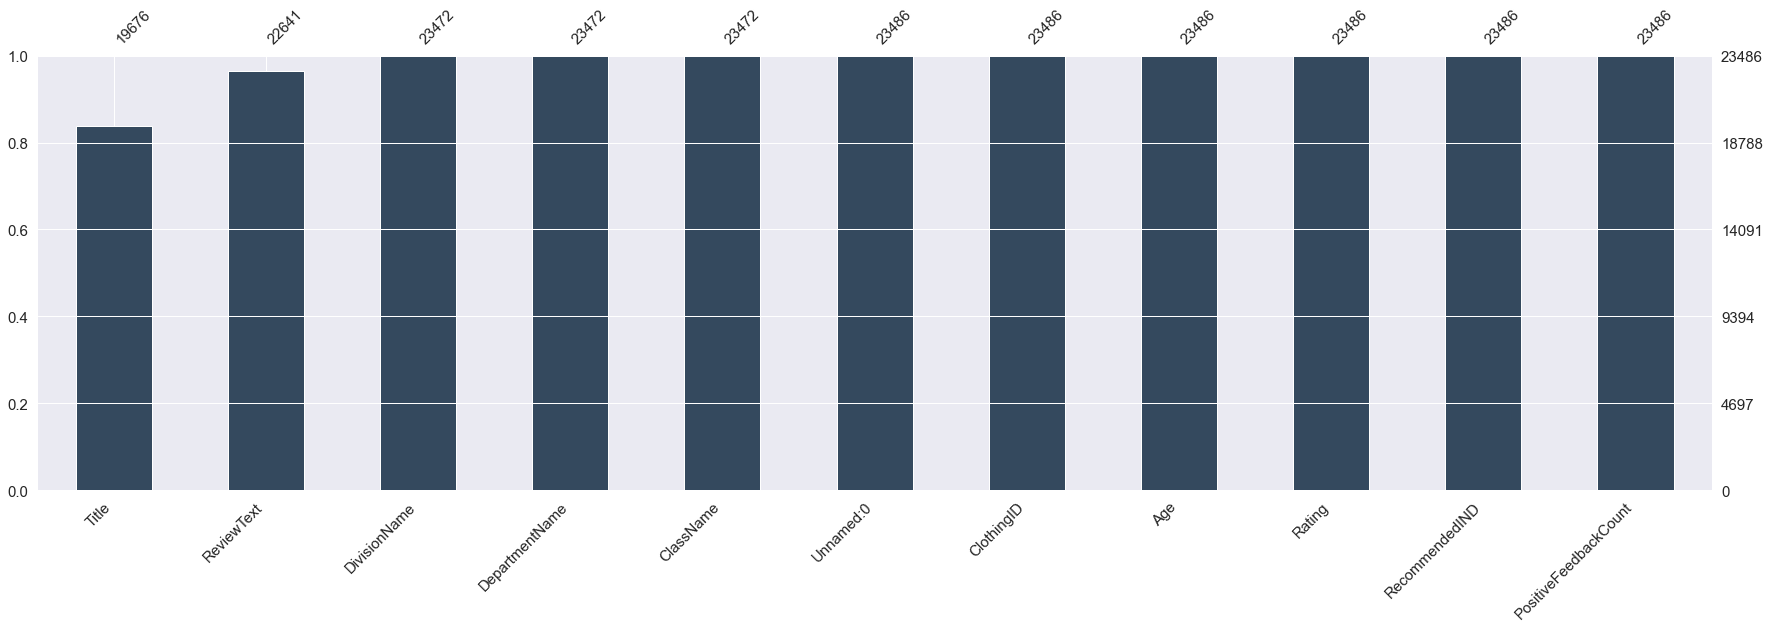

In [171]:
#Missing Numbers
import missingno as msno

msno.bar(data,sort="ascending",figsize=(30,8),color="#34495e",fontsize=15,labels=True)

In [172]:
data.isnull().sum()

Unnamed:0                   0
ClothingID                  0
Age                         0
Title                    3810
ReviewText                845
Rating                      0
RecommendedIND              0
PositiveFeedbackCount       0
DivisionName               14
DepartmentName             14
ClassName                  14
dtype: int64

# Title

In [173]:
data["no_title"] = np.where(data.Title.isnull(), 1, 0)

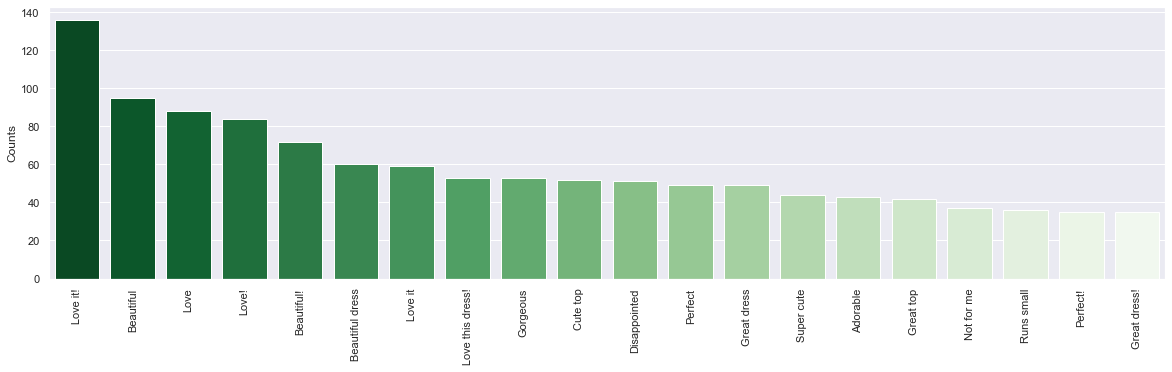

In [174]:
title_counts = data.Title.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(title_counts.index, title_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.xticks(rotation=90);

Text(0.5, 1.0, 'no_title')

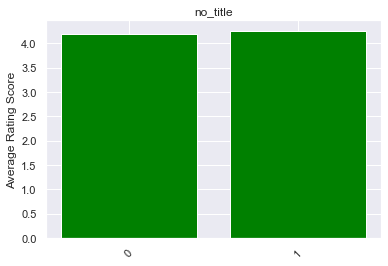

In [175]:
title_avg=data.groupby('no_title')['Rating'].mean()
plt.bar(title_avg.index,title_avg,color="Green")
plt.ylabel('Average Rating Score')
plt.xticks(title_avg.index,rotation=45)
plt.title('no_title')

# Review Text 

In [176]:
data["no_review"] = np.where(data.ReviewText.isnull(), 1, 0)

In [177]:
data.loc[(data["Title"].isnull()==True) & (data["ReviewText"].isnull()==True)].shape

(844, 13)

Text(0.5, 1.0, 'no_Review')

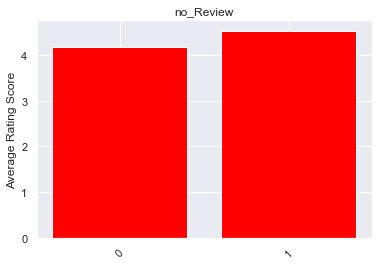

In [178]:
review_avg=data.groupby('no_review')['Rating'].mean()
plt.bar(review_avg.index,review_avg,color="Red")
plt.ylabel('Average Rating Score')
plt.xticks(title_avg.index,rotation=45)
plt.title('no_Review')

In [179]:
data = data.loc[(data["Title"].isnull()==False)]
data = data.loc[(data["ReviewText"].isnull()==False)]
data = data.drop(["no_title", "no_review"], axis=1)
print(data.shape)
data.isnull().sum()

(19675, 11)


Unnamed:0                 0
ClothingID                0
Age                       0
Title                     0
ReviewText                0
Rating                    0
RecommendedIND            0
PositiveFeedbackCount     0
DivisionName             13
DepartmentName           13
ClassName                13
dtype: int64

# Age

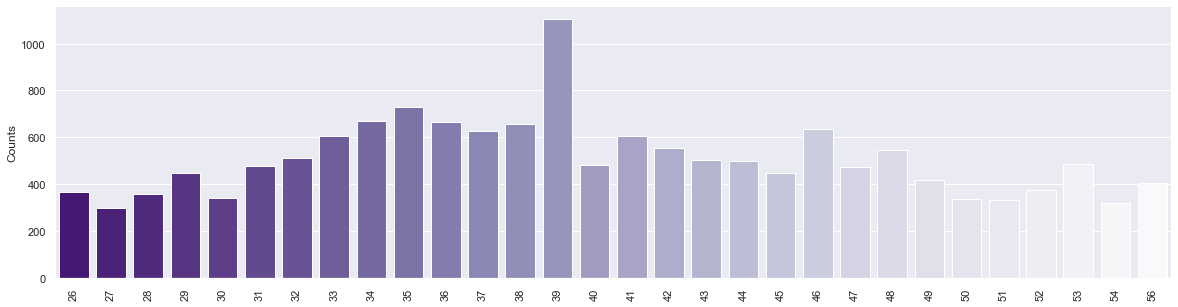

In [180]:
Age_counts = data.Age.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(Age_counts.index, Age_counts.values, palette="Purples_r")
plt.ylabel("Counts")
plt.xticks(rotation=90);

In [181]:
data.Age.describe()

count    19675.000000
mean        43.257942
std         12.256779
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

In [182]:
data.Age.quantile(0.99)

74.0

In [183]:
data['Age_band']=0
data.loc[(data['Age']>=18)&(data['Age']<34),'Age_band']=0
data.loc[(data['Age']>=34)&(data['Age']<41),'Age_band']=1
data.loc[(data['Age']>=41)&(data['Age']<52),'Age_band']=2
data.loc[(data['Age']>=52),'Age_band']=3

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

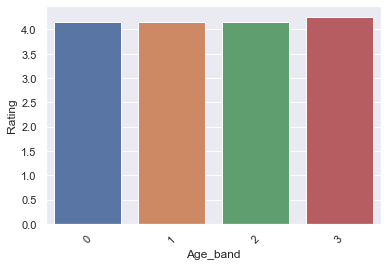

In [184]:
ageband_avg=data.groupby('Age_band')['Rating'].mean().reset_index()
sns.barplot(x='Age_band',y='Rating', data=ageband_avg)
plt.xticks(rotation=45)

# ClothingID

<AxesSubplot:>

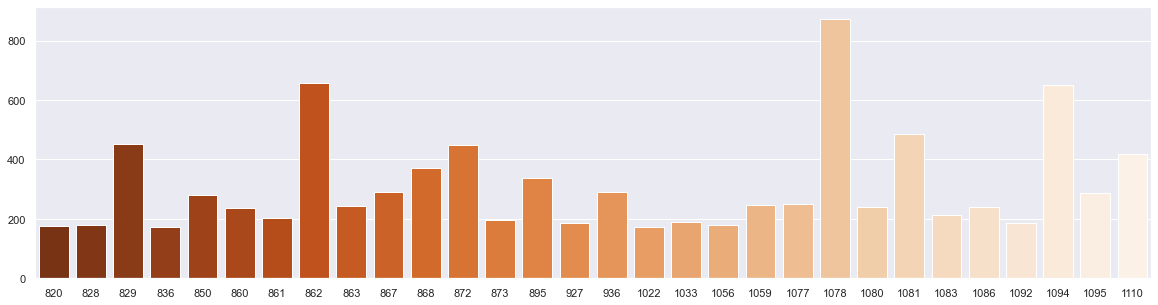

In [185]:

ClothingID_counts = data.ClothingID.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(ClothingID_counts.iloc[0:30].index,
            ClothingID_counts.iloc[0:30].values, palette="Oranges_r")

In [186]:
data["ClothingIDAgemean"]= data.ClothingID.map(data.groupby('ClothingID')['Age'].mean())
data.head()

,Unnamed:0,ClothingID,Age,Title,ReviewText,Rating,RecommendedIND,PositiveFeedbackCount,DivisionName,DepartmentName,ClassName,Age_band,ClothingIDAgemean
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,3,41.968127
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,2,44.440000
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,2,42.000000
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,2,40.792531
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1,44.500000


# RecommendedIND	

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

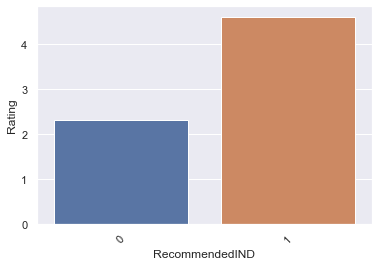

In [187]:
RecommendedIND_avg=data.groupby('RecommendedIND')['Rating'].mean().reset_index()
sns.barplot(x='RecommendedIND',y='Rating', data=RecommendedIND_avg)
plt.xticks(rotation=45)

# PositiveFeedbackCount

In [188]:
data.PositiveFeedbackCount.describe()

count    19675.000000
mean         2.651080
std          5.832711
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: PositiveFeedbackCount, dtype: float64

In [189]:
data["PositiveFeedbackCount95%"] = np.where(data.PositiveFeedbackCount>data.PositiveFeedbackCount.quantile(0.95), 1, 0)

In [190]:
data["PositiveFeedbackCountClothingID"] = data.ClothingID.map(data.groupby('ClothingID')['PositiveFeedbackCount'].mean().astype("int"))

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

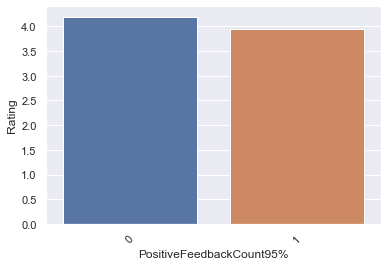

In [191]:
PositiveFeedbackCount95_avg=data.groupby('PositiveFeedbackCount95%')['Rating'].mean().reset_index()
sns.barplot(x='PositiveFeedbackCount95%',y='Rating', data=PositiveFeedbackCount95_avg)
plt.xticks(rotation=45)

In [192]:
data.groupby('PositiveFeedbackCount95%')['Rating'].mean()

PositiveFeedbackCount95%
0    4.195038
1    3.945190
Name: Rating, dtype: float64

In [193]:
np.corrcoef(data["Rating"], data["PositiveFeedbackCountClothingID"])

array([[ 1.        , -0.04777807],
       [-0.04777807,  1.        ]])

# DivisionName

In [194]:
data.loc[(data["DivisionName"].isnull()==True) & (data["DepartmentName"].isnull()==True)& (data["ClassName"].isnull()==True)].shape

(13, 15)

In [195]:
data.DivisionName.value_counts()

General           11664
General Petite     6778
Initmates          1220
Name: DivisionName, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'General'),
  Text(1, 0, 'General Petite'),
  Text(2, 0, 'Initmates')])

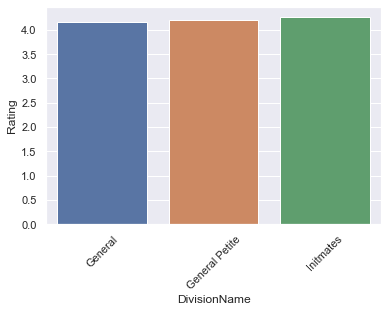

In [196]:

DivisionName_avg=data.groupby('DivisionName')['Rating'].mean().reset_index()
sns.barplot(x='DivisionName',y='Rating', data=DivisionName_avg)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

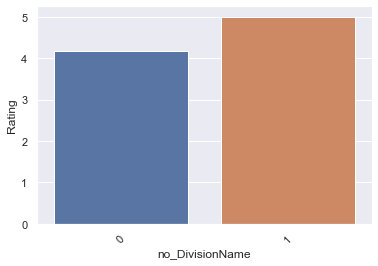

In [197]:
data["no_DivisionName"] = np.where(data.DivisionName.isnull(), 1, 0)

no_DivisionName_avg=data.groupby('no_DivisionName')['Rating'].mean().reset_index()
sns.barplot(x='no_DivisionName',y='Rating', data=no_DivisionName_avg)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

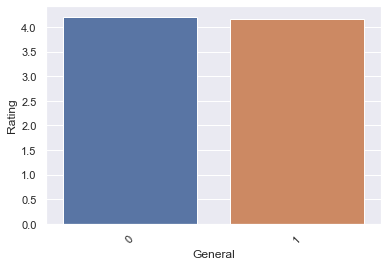

In [198]:
data["General"] = np.where(data.DivisionName=="General", 1, 0)

General_avg=data.groupby("General")['Rating'].mean().reset_index()
sns.barplot(x="General",y='Rating', data=General_avg)
plt.xticks(rotation=45)

# DepartmentName

In [199]:
data.DepartmentName.nunique()

6

In [200]:
data.DepartmentName.value_counts()

Tops        8713
Dresses     5371
Bottoms     3184
Intimate    1408
Jackets      879
Trend        107
Name: DepartmentName, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Bottoms'),
  Text(1, 0, 'Dresses'),
  Text(2, 0, 'Intimate'),
  Text(3, 0, 'Jackets'),
  Text(4, 0, 'Tops'),
  Text(5, 0, 'Trend')])

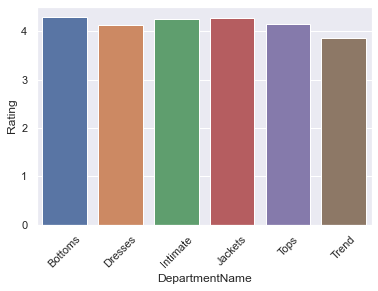

In [201]:

DepartmentName_avg=data.groupby('DepartmentName')['Rating'].mean().reset_index()
sns.barplot(x='DepartmentName',y='Rating', data=DepartmentName_avg)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

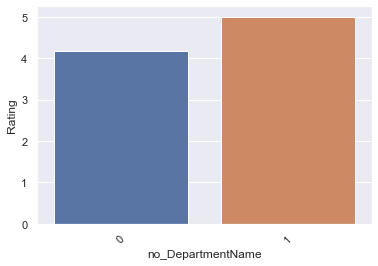

In [202]:
data["no_DepartmentName"] = np.where(data.DepartmentName.isnull(), 1, 0)

no_DepartmentName_avg=data.groupby('no_DepartmentName')['Rating'].mean().reset_index()
sns.barplot(x='no_DepartmentName',y='Rating', data=no_DepartmentName_avg)
plt.xticks(rotation=45)

# ClassName

In [203]:
data.ClassName.value_counts()

Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Casual bottoms       1
Chemises             1
Name: ClassName, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

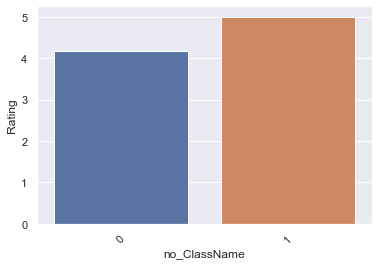

In [204]:
data["no_ClassName"] = np.where(data.ClassName.isnull(), 1, 0)
no_ClassName_avg=data.groupby('no_ClassName')['Rating'].mean().reset_index()
sns.barplot(x='no_ClassName',y='Rating', data=no_ClassName_avg)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Blouses'),
  Text(1, 0, 'Casual bottoms'),
  Text(2, 0, 'Chemises'),
  Text(3, 0, 'Dresses'),
  Text(4, 0, 'Fine gauge'),
  Text(5, 0, 'Intimates'),
  Text(6, 0, 'Jackets'),
  Text(7, 0, 'Jeans'),
  Text(8, 0, 'Knits'),
  Text(9, 0, 'Layering'),
  Text(10, 0, 'Legwear'),
  Text(11, 0, 'Lounge'),
  Text(12, 0, 'Outerwear'),
  Text(13, 0, 'Pants'),
  Text(14, 0, 'Shorts'),
  Text(15, 0, 'Skirts'),
  Text(16, 0, 'Sleep'),
  Text(17, 0, 'Sweaters'),
  Text(18, 0, 'Swim'),
  Text(19, 0, 'Trend')])

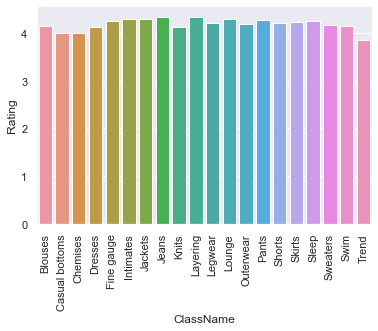

In [205]:
ClassName_avg=data.groupby('ClassName')['Rating'].mean().reset_index()
sns.barplot(x='ClassName',y='Rating', data=ClassName_avg)
plt.xticks(rotation=90)

In [206]:
data.head()

,Unnamed:0,ClothingID,Age,Title,ReviewText,Rating,RecommendedIND,PositiveFeedbackCount,DivisionName,DepartmentName,ClassName,Age_band,ClothingIDAgemean,PositiveFeedbackCount95%,PositiveFeedbackCountClothingID,no_DivisionName,General,no_DepartmentName,no_ClassName
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,3,41.968127,0,2,0,1,0,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,2,44.440000,0,3,0,0,0,0
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,2,42.000000,0,2,0,1,0,0
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,2,40.792531,0,3,0,1,0,0
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1,44.500000,0,2,0,0,0,0


# STR to NUM

In [212]:
ClassName_map = {}
num=1
for i in data.groupby("ClassName")["Rating"].mean().index:
    ClassName_map[i] = num
    num+=1
ClassName_map

{'Blouses': 1,
 'Casual bottoms': 2,
 'Chemises': 3,
 'Dresses': 4,
 'Fine gauge': 5,
 'Intimates': 6,
 'Jackets': 7,
 'Jeans': 8,
 'Knits': 9,
 'Layering': 10,
 'Legwear': 11,
 'Lounge': 12,
 'Outerwear': 13,
 'Pants': 14,
 'Shorts': 15,
 'Skirts': 16,
 'Sleep': 17,
 'Sweaters': 18,
 'Swim': 19,
 'Trend': 20}

In [207]:
data.DivisionName = data.DivisionName.map({"General":1, 'General Petite': 2, "Initmates": 3 })

In [213]:
data.loc[ data.DivisionName.isnull(),"DivisionName"] = 0


data.DepartmentName = data.DepartmentName.map({"Tops":1, 'Dresses': 2, "Bottoms": 3,
                                              "Intimate":4, 'Jackets': 5, "Trend": 6})
data.loc[ data.DepartmentName.isnull(),"DepartmentName"] =0 


data.ClassName = data.ClassName.map(ClassName_map)
data.loc[ data.ClassName.isnull(),"ClassName"] = 0

In [225]:
data.isnull().sum()

Unnamed:0                          0
ClothingID                         0
Age                                0
Title                              0
ReviewText                         0
Rating                             0
RecommendedIND                     0
PositiveFeedbackCount              0
DivisionName                       0
DepartmentName                     0
ClassName                          0
Age_band                           0
ClothingIDAgemean                  0
PositiveFeedbackCount95%           0
PositiveFeedbackCountClothingID    0
no_DivisionName                    0
General                            0
no_DepartmentName                  0
no_ClassName                       0
title_count                        0
dtype: int64

In [224]:
title_count=[]
for i in range(len(data)):
    count=0
    for h in data["Title"].iloc[i].split():
        count+=1
        
    title_count.append(count)
    
data["title_count"] = np.array(title_count)

In [226]:
review_char_count=[]
for i in range(len(data)):
    count=0
    for h in data["ReviewText"].iloc[i].split():
        count+=1
        
    review_char_count.append(count)
    
data["review_char_count"] = np.array(review_char_count)

In [228]:
data[["ReviewText", "Title"]].describe()

,ReviewText,Title
count,19675,19675
unique,19669,13992
top,Perfect fit and i've gotten so many compliment...,Love it!
freq,3,136


In [229]:
data[["review_char_count", "title_count"]].describe()

,review_char_count,title_count
count,19675.000000,19675.000000
mean,62.096315,3.344600
std,28.203760,1.796352
min,2.000000,1.000000
25%,38.000000,2.000000
50%,62.000000,3.000000
75%,90.000000,4.000000
max,115.000000,12.000000


<AxesSubplot:>

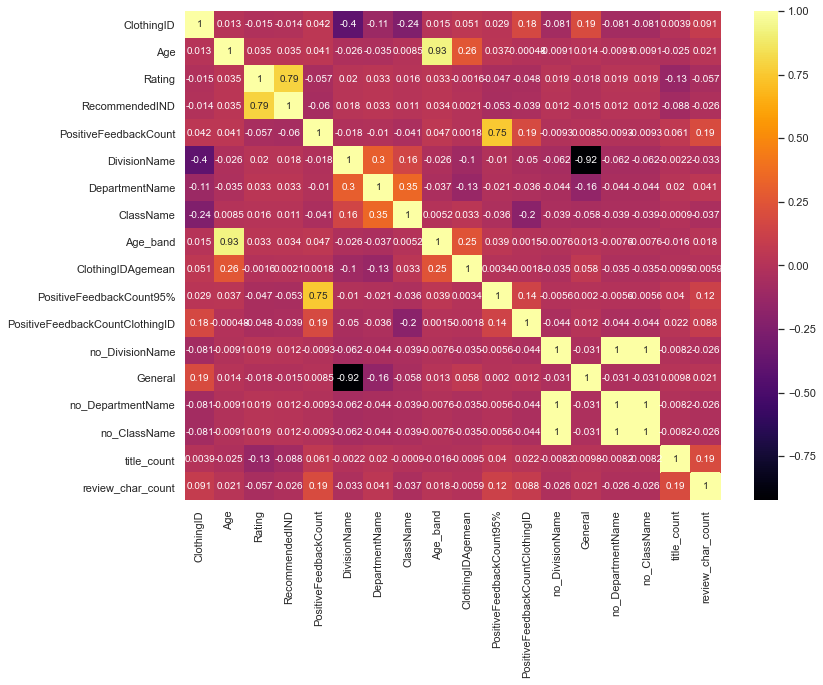

In [233]:
#Correlation Matrix:
corr_df = data[[i for i in data.columns if i not in ['Unnamed:0', 'ReviewText', 'Title'] ]]    
corr_df = corr_df.corr()

# Set up the matplot figure
f,ax = plt.subplots(figsize=(12,9))

#Draw the heatmap using seaborn
sns.heatmap(corr_df, cmap='inferno', annot=True)

# learning and prediction

In [239]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [251]:
dataset = data[[i for i in data.columns if i not in ['Unnamed:0', 'ReviewText', 'Title'] ]] 

In [252]:
X, y = dataset[[i for i in dataset.columns if i not in ["Rating"] ]], dataset["Rating"]

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2 ,random_state = 20)
print(X_train.shape, X_test.shape)

(15740, 17) (3935, 17)


In [273]:
data.to_csv('./input/data_cloned.csv', index=False)

In [244]:

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [245]:
params={'learning_rate': 0.03,
        'objective':'regression',
        'metric':'rmse',
         'num_leaves': 10,
        'verbose': 1,
        'subsample': 0.8388825269901063,
       'colsample_bytree': 0.4453924022919999,
        "random_state":42,
        'max_depth': 15,
        'lambda_l2': 0.02085548700474218,
        'lambda_l1': 0.004107624022751344,
        'bagging_fraction': 0.7934712636944741,
        'feature_fraction': 0.686612409641711,
        'min_child_weight': 0.01,
        'min_child_samples': 21,
        'reg_alpha': 7,
        'reg_lambda': 50,
       }

In [258]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=1, shuffle=True)
np.random.seed(0)

In [264]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

vis_importances = pd.DataFrame()
for i, (train, test) in enumerate(kf.split(X_train)):
    print("Fold:", i+1)
    print(train)
    trn_x, trn_y = X_train.iloc[train], y_train.iloc[train]
    val_x, val_y = X_train.iloc[test], y_train.iloc[test]
    
    lgb_reg = lgb.LGBMRegressor(**params,
                                n_estimators=1500

    )
    lgb_result = lgb_reg.fit(
        trn_x, trn_y,
        eval_set=[(trn_x, trn_y), (val_x, val_y)],
        eval_names=['TRAIN', 'VALID'],
        early_stopping_rounds=50,
        eval_metric='rmse',
        verbose=100,
        callbacks=[lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_0995)]
    )
   
    imp_df = pd.DataFrame()
    imp_df['feature'] = dataset.drop('Rating',axis=1).columns
    imp_df['gain'] = lgb_reg.booster_.feature_importance(importance_type='gain')
    
    imp_df['fold'] = i + 1
    vis_importances = pd.concat([vis_importances, imp_df], axis=0, sort=False)
    

Fold: 1
[    0     1     2 ... 15737 15738 15739]
[LightGBM] [Warning] feature_fraction is set=0.686612409641711, colsample_bytree=0.4453924022919999 will be ignored. Current value: feature_fraction=0.686612409641711
[LightGBM] [Warning] lambda_l1 is set=0.004107624022751344, reg_alpha=7 will be ignored. Current value: lambda_l1=0.004107624022751344
[LightGBM] [Warning] bagging_fraction is set=0.7934712636944741, subsample=0.8388825269901063 will be ignored. Current value: bagging_fraction=0.7934712636944741
[LightGBM] [Warning] lambda_l2 is set=0.02085548700474218, reg_lambda=50 will be ignored. Current value: lambda_l2=0.02085548700474218
[LightGBM] [Warning] feature_fraction is set=0.686612409641711, colsample_bytree=0.4453924022919999 will be ignored. Current value: feature_fraction=0.686612409641711
[LightGBM] [Warning] lambda_l1 is set=0.004107624022751344, reg_alpha=7 will be ignored. Current value: lambda_l1=0.004107624022751344
[LightGBM] [Warning] bagging_fraction is set=0.79

C:\Users\taimo\anaconda3\envs\test2\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='gain_log', ylabel='feature'>

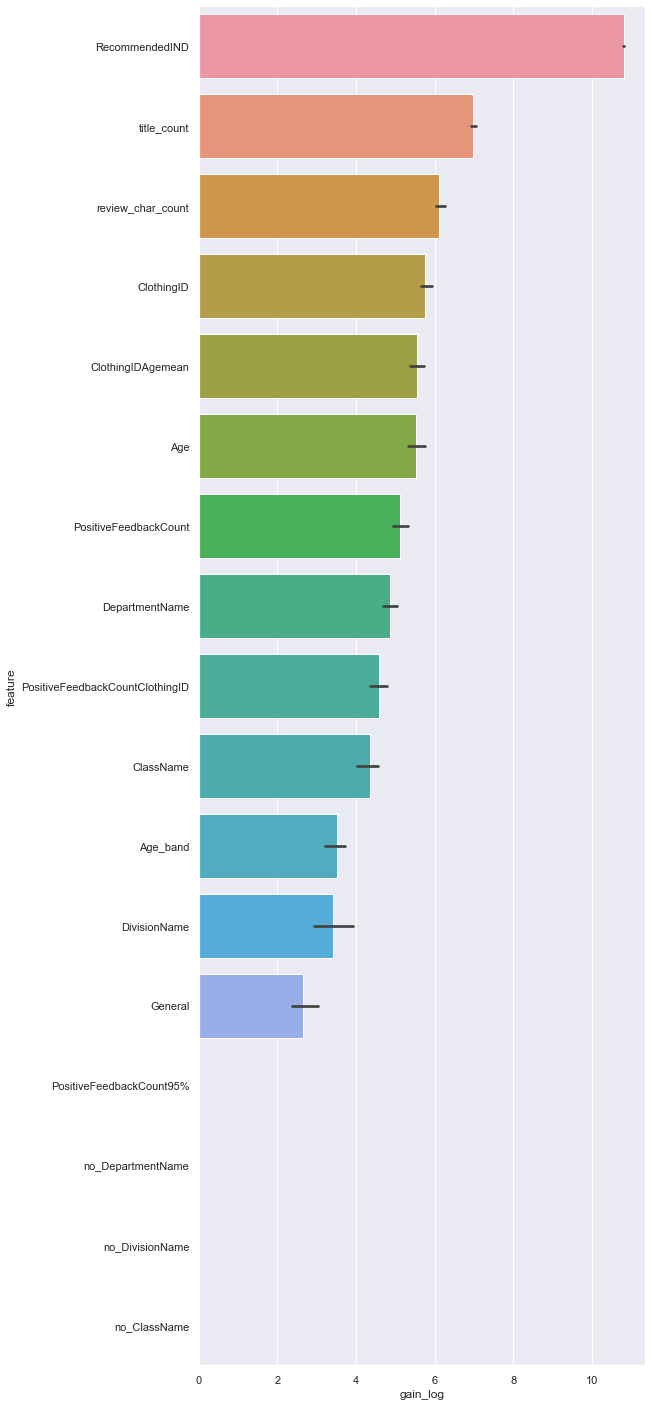

In [266]:
vis_importances['gain_log'] = np.log(vis_importances['gain'])
mean_gain = vis_importances[['gain', 'feature']].groupby('feature').mean()
vis_importances['mean_gain'] = vis_importances['feature'].map(mean_gain['gain'])

plt.figure(figsize=(8, 25))
sns.barplot(x='gain_log', y='feature', data=vis_importances.sort_values('mean_gain', ascending=False).iloc[:300])

In [267]:
pred = lgb_reg.predict(X_test)
pred

array([4.7056452 , 4.41363301, 4.42323472, ..., 4.70679161, 4.70679161,
       4.52355423])

In [268]:
#Calculate Error
error = pred - y_test
error = abs(error)
error_rate = np.mean(error)/np.mean(y_test)
print("error rate = %f " %error_rate )

error rate = 0.134480 
